In [ ]:
# Ana Dognini e Gustavo W. Antunes

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import pickle
import plotly.express as px
from yellowbrick.classifier import ConfusionMatrix

#Parte 1

#### Importando a base de dados

In [ ]:
# Carregar a base de dados
dataset_risco_credito = pd.read_csv('dataset_risco_credito.csv')

# Visualizar os dados
dataset_risco_credito.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [ ]:
dataset_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
dataset_risco_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   historia   14 non-null     object
 1   divida     14 non-null     object
 2   garantias  14 non-null     object
 3   renda      14 non-null     object
 4   risco      14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


#### Pré-processamento dos dados

In [ ]:
# a) Divisão da base de dados: separar os atributos (X) e a classe (y)

X_risco_credito = dataset_risco_credito.iloc[:, 0:-1].values # Todas as colunas, exceto a última
y_risco_credito = dataset_risco_credito.iloc[:, -1].values # Apenas a última coluna

In [ ]:
print("X antes do LabelEncoder:\n", X_risco_credito)
print("\ny antes do LabelEncoder:", y_risco_credito)

X antes do LabelEncoder:
 [['ruim' 'alta' 'nenhuma' '0_15']
 ['desconhecida' 'alta' 'nenhuma' '15_35']
 ['desconhecida' 'baixa' 'nenhuma' '15_35']
 ['desconhecida' 'baixa' 'nenhuma' 'acima_35']
 ['desconhecida' 'baixa' 'nenhuma' 'acima_35']
 ['desconhecida' 'baixa' 'adequada' 'acima_35']
 ['ruim' 'baixa' 'nenhuma' '0_15']
 ['ruim' 'baixa' 'adequada' 'acima_35']
 ['boa' 'baixa' 'nenhuma' 'acima_35']
 ['boa' 'alta' 'adequada' 'acima_35']
 ['boa' 'alta' 'nenhuma' '0_15']
 ['boa' 'alta' 'nenhuma' '15_35']
 ['boa' 'alta' 'nenhuma' 'acima_35']
 ['ruim' 'alta' 'nenhuma' '15_35']]

y antes do LabelEncoder: ['alto' 'alto' 'moderado' 'alto' 'baixo' 'baixo' 'alto' 'moderado' 'baixo'
 'baixo' 'alto' 'moderado' 'baixo' 'alto']


In [ ]:
# b) Aplicar LabelEncoder: para transformar textos em números

labelencoder = LabelEncoder()

# Aplicando o LabelEncoder em cada coluna de X
for i in range(X_risco_credito.shape[1]):
    X_risco_credito[:, i] = labelencoder.fit_transform(X_risco_credito[:, i])

# Também aplicamos no y
y_risco_credito = labelencoder.fit_transform(y_risco_credito)

# Verificando
print("X após LabelEncoder:\n", X_risco_credito)
print("\ny após LabelEncoder:", y_risco_credito)

X após LabelEncoder:
 [[2 0 1 0]
 [1 0 1 1]
 [1 1 1 1]
 [1 1 1 2]
 [1 1 1 2]
 [1 1 0 2]
 [2 1 1 0]
 [2 1 0 2]
 [0 1 1 2]
 [0 0 0 2]
 [0 0 1 0]
 [0 0 1 1]
 [0 0 1 2]
 [2 0 1 1]]

y após LabelEncoder: [0 0 2 0 1 1 0 2 1 1 0 2 1 0]


In [ ]:
# c) Salvar os dados pré-processados

with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, y_risco_credito], f)

#### Criando o modelo

In [ ]:
# a) Importar e criar o modelo

naiveb_risco_credito = GaussianNB()

In [ ]:
# b) Treinando o modelo

naiveb_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

#### Previsões

Sabendo que, após o LabelEncoder, temos:

História:
*   Desconhecida = 1
*   Ruim = 2
*   Boa = 0

Dívidas:
* Alta = 0
* Baixa = 1

Garantias:
* Nenhuma = 1
* Adequada = 0

Renda:
* 0_15 = 0
* 15_35 = 1
* acima_35 = 2

Risco:
* Alto = 0
* Moderado = 2
* Baixo = 1

In [ ]:
# i) história boa, dívida alta, garantia nenhuma, renda > 35

exemplo1 = [0, 0, 1, 2]

# ii) história ruim, dívida alta, garantia adequada, renda < 15

exemplo2 = [2, 0, 0, 0]

In [ ]:
previsao1 = naiveb_risco_credito.predict([exemplo1])
previsao2 = naiveb_risco_credito.predict([exemplo2])

print("Previsão do exemplo 1:", previsao1, labelencoder.inverse_transform(previsao1))
print("Previsão do exemplo 2:", previsao2, labelencoder.inverse_transform(previsao2))

# Exemplo 1: risco baixo
# Exemplo 2: risco moderado

Previsão do exemplo 1: [1] ['baixo']
Previsão do exemplo 2: [2] ['moderado']


#### Mostrando as classes e contagens



In [ ]:
# Classes identificadas
print("Classes:", naiveb_risco_credito.classes_)

# Contagem de registros por classe
print("Contagem por classe:", naiveb_risco_credito.class_count_)

Classes: [0 1 2]
Contagem por classe: [6. 5. 3.]


#Parte 2

#### Importação dos Dados Pré-Processados

In [ ]:
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

#### Algoritmo de Árvore de Decisão

In [ ]:
# a) Criando e treinando a árvore de decisão

arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# b) Verificando a importância dos atributos

print("Importância dos atributos:", arvore_risco_credito.feature_importances_)

Importância dos atributos: [0.48015651 0.03885431 0.03885431 0.44213486]


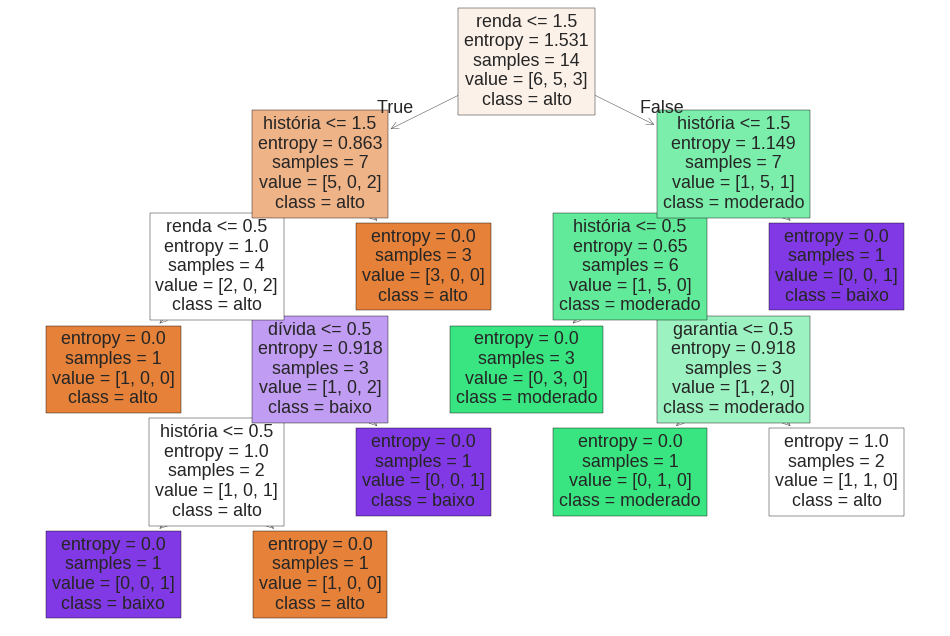

In [ ]:
# d) Visualizar a árvore de decisão

plt.figure(figsize=(12, 8))
tree.plot_tree(
    arvore_risco_credito,
    feature_names=['história', 'dívida', 'garantia', 'renda'],
    class_names=['alto', 'moderado', 'baixo'],
    filled=True
)

plt.show()

#### Fazendo as previsões

In [ ]:
# i) história boa, dívida alta, garantia nenhuma, renda > 35

exemplo_1 = [[0, 0, 1, 2]]

# ii) história ruim, dívida alta, garantia adequada, renda < 15

exemplo_2 = [[2, 0, 0, 0]]

In [ ]:
previsao_1 = arvore_risco_credito.predict(exemplo_1)
previsao_2 = arvore_risco_credito.predict(exemplo_2)

In [ ]:
print("Previsões:", previsao1, labelencoder.inverse_transform(previsao_1))
print("Previsões:", previsao2, labelencoder.inverse_transform(previsao_2))

Previsões: [1] ['baixo']
Previsões: [2] ['alto']


#### Árvore de Decisão com base maior: credit.pkl

In [ ]:
# a) Carregar os dados

with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

# Verificar dimensões
print("Treinamento:", X_credit_treinamento.shape, y_credit_treinamento.shape)
print("Teste:", X_credit_teste.shape, y_credit_teste.shape)

Treinamento: (1500, 3) (1500,)
Teste: (500, 3) (500,)


In [ ]:
# b) Treinar a árvore com random_state = 0

arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# c) Fazer previsões

previsoes = arvore_credit.predict(X_credit_teste)
print("Previsões:", previsoes)

Previsões: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0

In [ ]:
# d) Acurácia

acuracia = accuracy_score(y_credit_teste, previsoes)
print("Acurácia:", acuracia)

Acurácia: 0.982


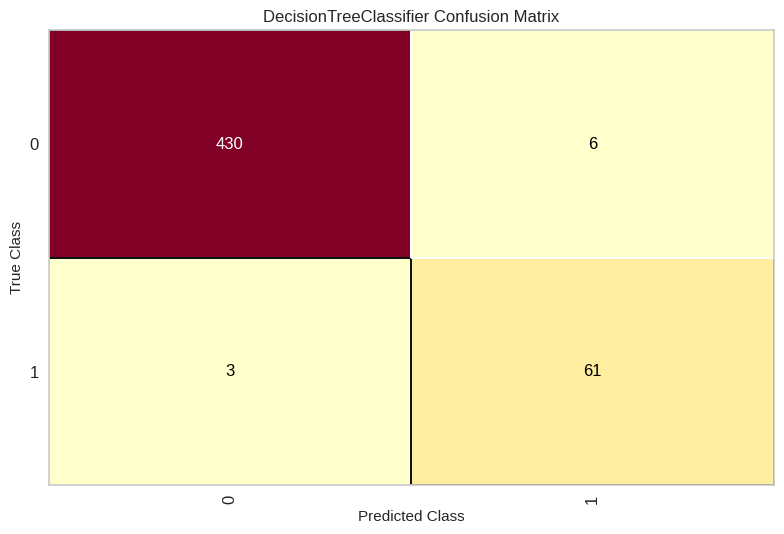

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# e) Matriz de confusão

cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)
cm.show()


# GUSTAVO
# Responda:

# i. Clientes classificados corretamente que pagam? 430
# ii. Clientes classificados incorretamente como não pagantes? 6
# iii. Clientes classificados corretamente que não pagam? 61
# iv. Clientes classificados incorretamente como pagantes? 3

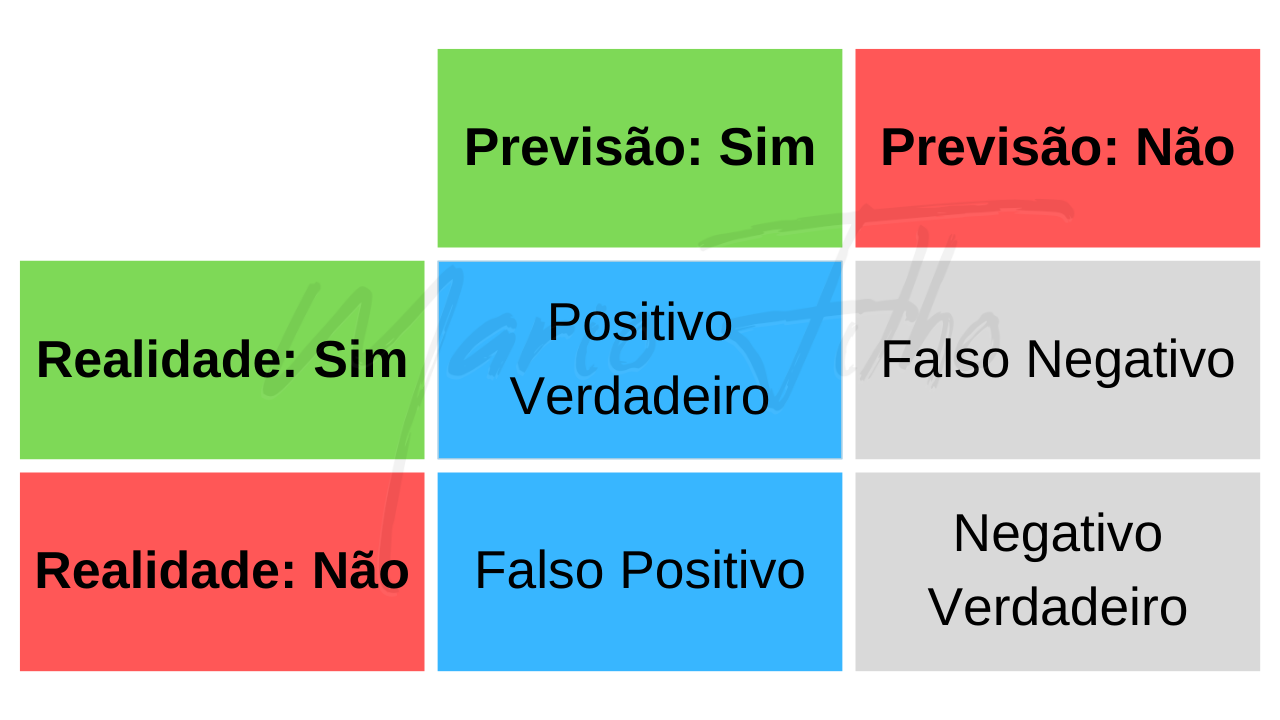

In [ ]:
# f) Classification report

print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



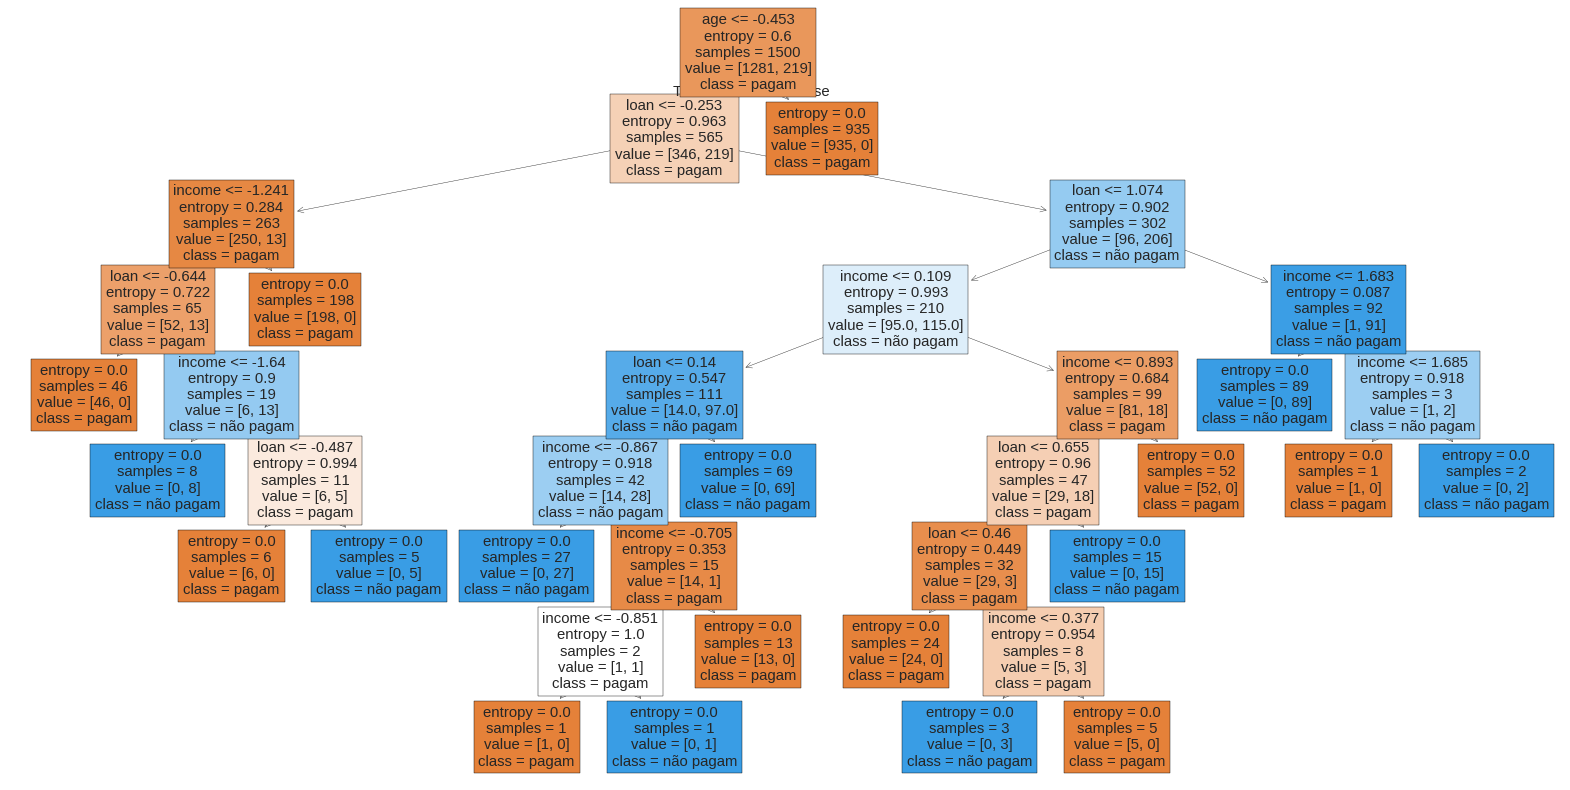

In [ ]:
# g) Visualizar árvore com nomes

plt.figure(figsize=(20,10))
tree.plot_tree(
    arvore_credit,
    feature_names=['income', 'age', 'loan'],
    class_names=['pagam', 'não pagam'],
    filled=True
)

plt.show()

#### Random Forest - Floresta Aleatória

In [ ]:
# a) Treinar o modelo

floresta_credit = RandomForestClassifier(
    n_estimators=10,
    criterion='entropy',
    random_state=0
)

floresta_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# b) Previsões

previsoes_floresta = floresta_credit.predict(X_credit_teste)
print(previsoes_floresta)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 

In [ ]:
# c) Acurácia

acuracia_floresta = accuracy_score(y_credit_teste, previsoes_floresta)
print("Acurácia Random Forest:", acuracia_floresta)

Acurácia Random Forest: 0.968


In [ ]:
# d) Melhorar resultado?

# GUSTAVO

# Você pode testar com mais árvores (n_estimators=100), ajustar max_depth, usar validação cruzada etc.

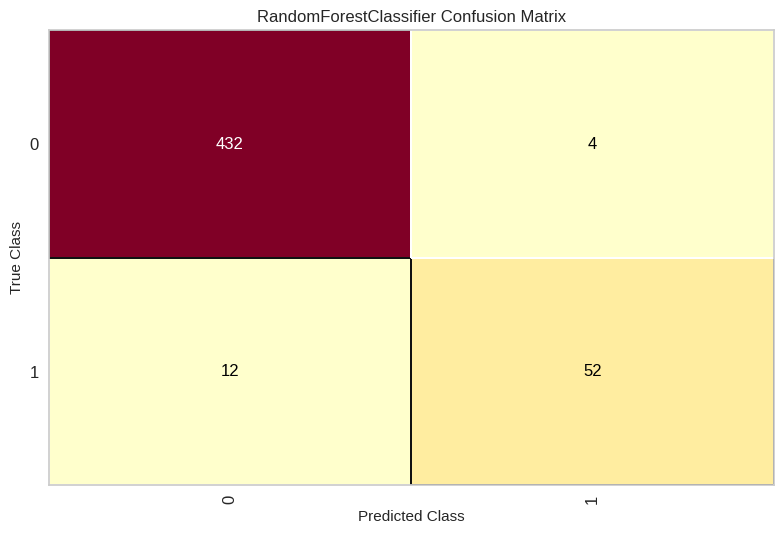

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
# e) Matriz de confusão

cm_floresta = ConfusionMatrix(floresta_credit)
cm_floresta.fit(X_credit_treinamento, y_credit_treinamento)
cm_floresta.score(X_credit_teste, y_credit_teste)
cm_floresta.show()

In [ ]:
# f) Classification report

print(classification_report(y_credit_teste, previsoes_floresta))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       436
           1       0.93      0.81      0.87        64

    accuracy                           0.97       500
   macro avg       0.95      0.90      0.92       500
weighted avg       0.97      0.97      0.97       500



# Parte 3

####Carregar os dados pré-processados

In [ ]:
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

####Reverter o LabelEncoder para filtrar os registros com a classe "moderado"

In [ ]:
# a) Criando um LabelEncoder para a classe original

labelencoder_risco = LabelEncoder()
labelencoder_risco.fit(['alto', 'moderado', 'baixo']) # Fit com todas as classes possíveis originais

y_risco_credito_original = labelencoder_risco.inverse_transform(y_risco_credito)

In [ ]:
# b) Criando um DataFrame temporário para facilitar a filtragem

df_risco_credito = pd.DataFrame(X_risco_credito)
df_risco_credito['risco'] = y_risco_credito_original

In [ ]:
# c) Filtrando os registros que não são "moderado"

df_risco_credito_filtrado = df_risco_credito[df_risco_credito['risco'] != 'moderado'].copy()

In [ ]:
# d) Separando X e y novamente

X_risco_credito_filtrado = df_risco_credito_filtrado.iloc[:, :-1].values
y_risco_credito_filtrado = df_risco_credito_filtrado.iloc[:, -1].values

In [ ]:
# e) Aplicando LabelEncoder novamente na classe filtrada

labelencoder_risco_filtrado = LabelEncoder()
y_risco_credito_filtrado = labelencoder_risco_filtrado.fit_transform(y_risco_credito_filtrado)

####Regressão Logística com random_state

In [ ]:
# a) Importando e treinando o modelo

regressao_logistica_risco_credito = LogisticRegression(random_state=1)
regressao_logistica_risco_credito.fit(X_risco_credito_filtrado, y_risco_credito_filtrado)

LogisticRegression(random_state=1)

In [ ]:
# b) Imprimindo o intercept

# Intercepto é o valor base da previsão quando todos os atributos são zero.

# Também conhecido como viés (bias), é o valor da variável dependente quando
# todos os atributos são zero.
# Em uma regressão linear simples, é onde a linha de regressão cruza o eixo Y [1].

print("Intercept (B0):", regressao_logistica_risco_credito.intercept_)

Intercept (B0): [-0.80855152]


In [ ]:
# c) Imprimindo os coeficientes

# Coeficientes dizem o quanto cada atributo influencia a previsão.

# Representa o peso ou a importância de cada atributo (feature) para o modelo
# fazer suas previsões.
# Em uma regressão linear simples (com apenas um atributo), o coeficiente
# seria a inclinação da linha. Ele nos diz o quanto a variável dependente
# (o que você está tentando prever) muda quando a variável independente
# (o atributo) aumenta em uma unidade.

print("Coeficientes:", regressao_logistica_risco_credito.coef_)

Coeficientes: [[-0.76706797  0.23921064 -0.47989768  1.12196145]]


####Previsões

In [ ]:
# a) Utilizando o comando ‘predict’ para fazer o teste do algoritmo

# i) história boa, dívida alta, garantia nenhuma, renda > 35
exemplo_a = [[0, 0, 1, 2]]

# ii) história ruim, dívida alta, garantia adequada, renda < 15
exemplo_b = [[2, 0, 0, 0]]

previsao_a = regressao_logistica_risco_credito.predict(exemplo_a)
previsao_b = regressao_logistica_risco_credito.predict(exemplo_b)

In [ ]:
# b) Imprimindo as previsões

print("Previsão para exemplo a:", labelencoder_risco_filtrado.inverse_transform(previsao_a))
print("Previsão para exemplo b:", labelencoder_risco_filtrado.inverse_transform(previsao_b))

Previsão para exemplo a: ['baixo']
Previsão para exemplo b: ['alto']
